In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Timestamp

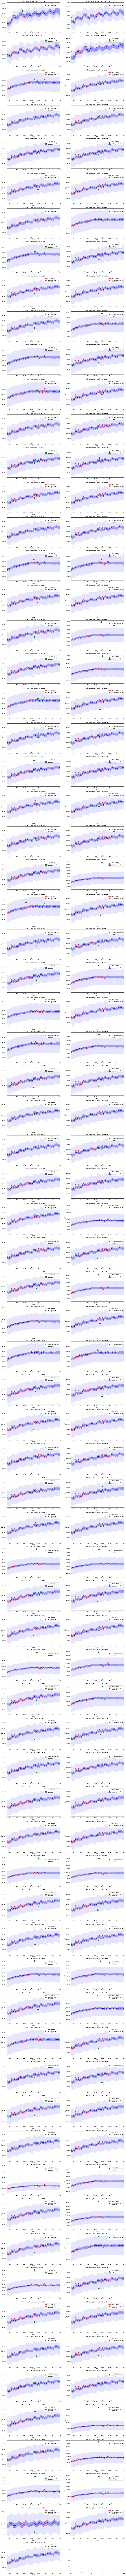

In [6]:
df1 = pd.read_csv("merged_df_anvil.csv")
merged_df = df1
merged_df["last_transaction_date"] = merged_df["last_transaction_date"].astype('datetime64[ns]')
df = pd.read_csv("ref_props_anvil_new.csv")
ref_props = df.to_dict('records')
f, axs = plt.subplots(int(len(ref_props)/2)+1,2,figsize=(20,6*int(len(ref_props)/2+1)))
for i,p in enumerate(ref_props):
    ax = axs.flat[i]
    forecast = pd.DataFrame(eval(p["forecast"]))
    target_ts = pd.DataFrame(eval(p["target_ts"]))
    target_time = p["target_time"]
    target_mean = p["target_mean"]
    if forecast is None or target_ts is None:
        continue
    forecast["yhat_upper"] = target_mean * forecast["yhat_upper"]
    forecast["yhat_lower"] = target_mean * forecast["yhat_lower"]
    forecast["yhat_upper_total"] = target_mean * forecast["yhat_upper_total"]
    forecast["yhat_lower_total"] = target_mean * forecast["yhat_lower_total"]
    forecast["yhat"] = target_mean * forecast["yhat"]
    target_ts["value"] = target_mean * target_ts["value"]
    target_ts.loc[target_ts["end"]<=target_time].plot(x="end", y="value", ylabel="target", color="red", label = "truth - training", ax=ax)
    ax.fill_between(list(forecast["ds"]), list(forecast["yhat_upper"]), list(forecast["yhat_lower"]), color="blue", alpha=0.3)
    ax.fill_between(list(forecast["ds"]), list(forecast["yhat_upper_total"]), list(forecast["yhat_lower_total"]), color="blue", alpha=0.1)
    mcopy = merged_df.loc[i:i].copy()
    mcopy.loc[mcopy["last_transaction_date"]<forecast["ds"].min(), "last_transaction_date"] = forecast["ds"].min()
    mcopy.plot(x="last_transaction_date",y="last_transaction_price", ax=ax, style='g^',  markersize=14)
    forecast.plot(x="ds", y="yhat",xlabel='date', ylabel='target', color="blue", ax=ax, label = "prediction", xlim=(forecast["ds"].min(),forecast["ds"].max()))
    ax.set_title(p["address"])
plt.show()